In [1]:
library(Seurat)
library(tidyverse)
# library(SeuratWrappers)
library(future)
library(ggplot2)
library(SeuratObject)
library(viridis)
# library(ggpubr)
library(scales)
library(presto)
library(clusterProfiler)
library(org.Hs.eg.db)
library(enrichplot)

Warning message:
“package ‘Seurat’ was built under R version 4.4.3”
Loading required package: SeuratObject

Warning message:
“package ‘SeuratObject’ was built under R version 4.4.3”
Loading required package: sp

Warning message:
“package ‘sp’ was built under R version 4.4.3”



Attaching package: ‘SeuratObject’


The following objects are masked from ‘package:base’:

    intersect, t


Warning message:
“package ‘tidyverse’ was built under R version 4.4.3”
Warning message:
“package ‘ggplot2’ was built under R version 4.4.3”
Warning message:
“package ‘tibble’ was built under R version 4.4.3”
Warning message:
“package ‘tidyr’ was built under R version 4.4.3”
Warning message:
“package ‘readr’ was built under R version 4.4.3”
Warning message:
“package ‘purrr’ was built under R version 4.4.3”
Warning message:
“package ‘dplyr’ was built under R version 4.4.3”
Warning message:
“package ‘stringr’ was built under R version 4.4.3”
Warning message:
“package ‘forcats’ was built under R version 4.4.3”
Warning message:
“package ‘lubridate’ was built under R version 4.4.3”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.1     ✔ stringr   1.5.2
✔ ggplot2   4.0.0     ✔ tibble    3.3.0
✔ l

In [2]:
plot_dir <- file.path('/mnt/18T/chibao/gliomas/data/upstream/scRNA/official/integrated_v5_optimized/plots', 'harmony_2.png')

#  Load Data

In [3]:
obj <- readRDS('/mnt/18T/chibao/gliomas/data/upstream/scRNA/official/integrated_v5_optimized/scrna_integrated_harmony_final.rds')
obj

An object of class Seurat 
74643 features across 375000 samples within 2 assays 
Active assay: SCT (36037 features, 3000 variable features)
 3 layers present: counts, data, scale.data
 1 other assay present: RNA
 4 dimensional reductions calculated: pca, umap, harmony, umap.harmony

In [4]:
obj@meta.data |> head()

,orig.ident,nCount_RNA,nFeature_RNA,project_id,orig_sample_id,sample_uid,genome,chemistry,percent.mt,doublet_class,⋯,SCT_snn_res.0.1,SCT_snn_res.0.2,SCT_snn_res.0.4,SCT_snn_res.0.5,SCT_snn_res.0.6,SCT_snn_res.0.7,SCT_snn_res.0.8,SCT_snn_res.1,SCT_snn_res.1.2,seurat_clusters
,<chr>,<dbl>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,⋯,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_AAACCCAAGTCAAGCG-1,PRJNA1125010,6520,1839,PRJNA1125010,PRJNA1125010__filtered_feature_bc_matrix,PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099,GRCh38,10x,6.1196319,singlet,⋯,3,3,23,25,29,30,43,45,38,38
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_AAACCCACATTGCCGG-1,PRJNA1125010,4533,1962,PRJNA1125010,PRJNA1125010__filtered_feature_bc_matrix,PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099,GRCh38,10x,14.7804986,singlet,⋯,4,5,8,15,7,18,27,24,22,22
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_AAACGAAAGCTCTGTA-1,PRJNA1125010,50471,7374,PRJNA1125010,PRJNA1125010__filtered_feature_bc_matrix,PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099,GRCh38,10x,7.7450417,singlet,⋯,1,6,6,3,2,15,3,17,33,33
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_AAACGAATCCCATAAG-1,PRJNA1125010,41082,7762,PRJNA1125010,PRJNA1125010__filtered_feature_bc_matrix,PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099,GRCh38,10x,5.9661165,singlet,⋯,3,3,4,8,10,13,13,12,12,12
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_AAACGCTAGTCACTAC-1,PRJNA1125010,11161,3306,PRJNA1125010,PRJNA1125010__filtered_feature_bc_matrix,PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099,GRCh38,10x,0.5286265,singlet,⋯,1,6,6,3,2,15,3,17,33,33
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_AAAGAACAGTGTCATC-1,PRJNA1125010,2965,1417,PRJNA1125010,PRJNA1125010__filtered_feature_bc_matrix,PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099,GRCh38,10x,8.5666105,singlet,⋯,1,5,24,15,7,32,29,30,31,31


Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



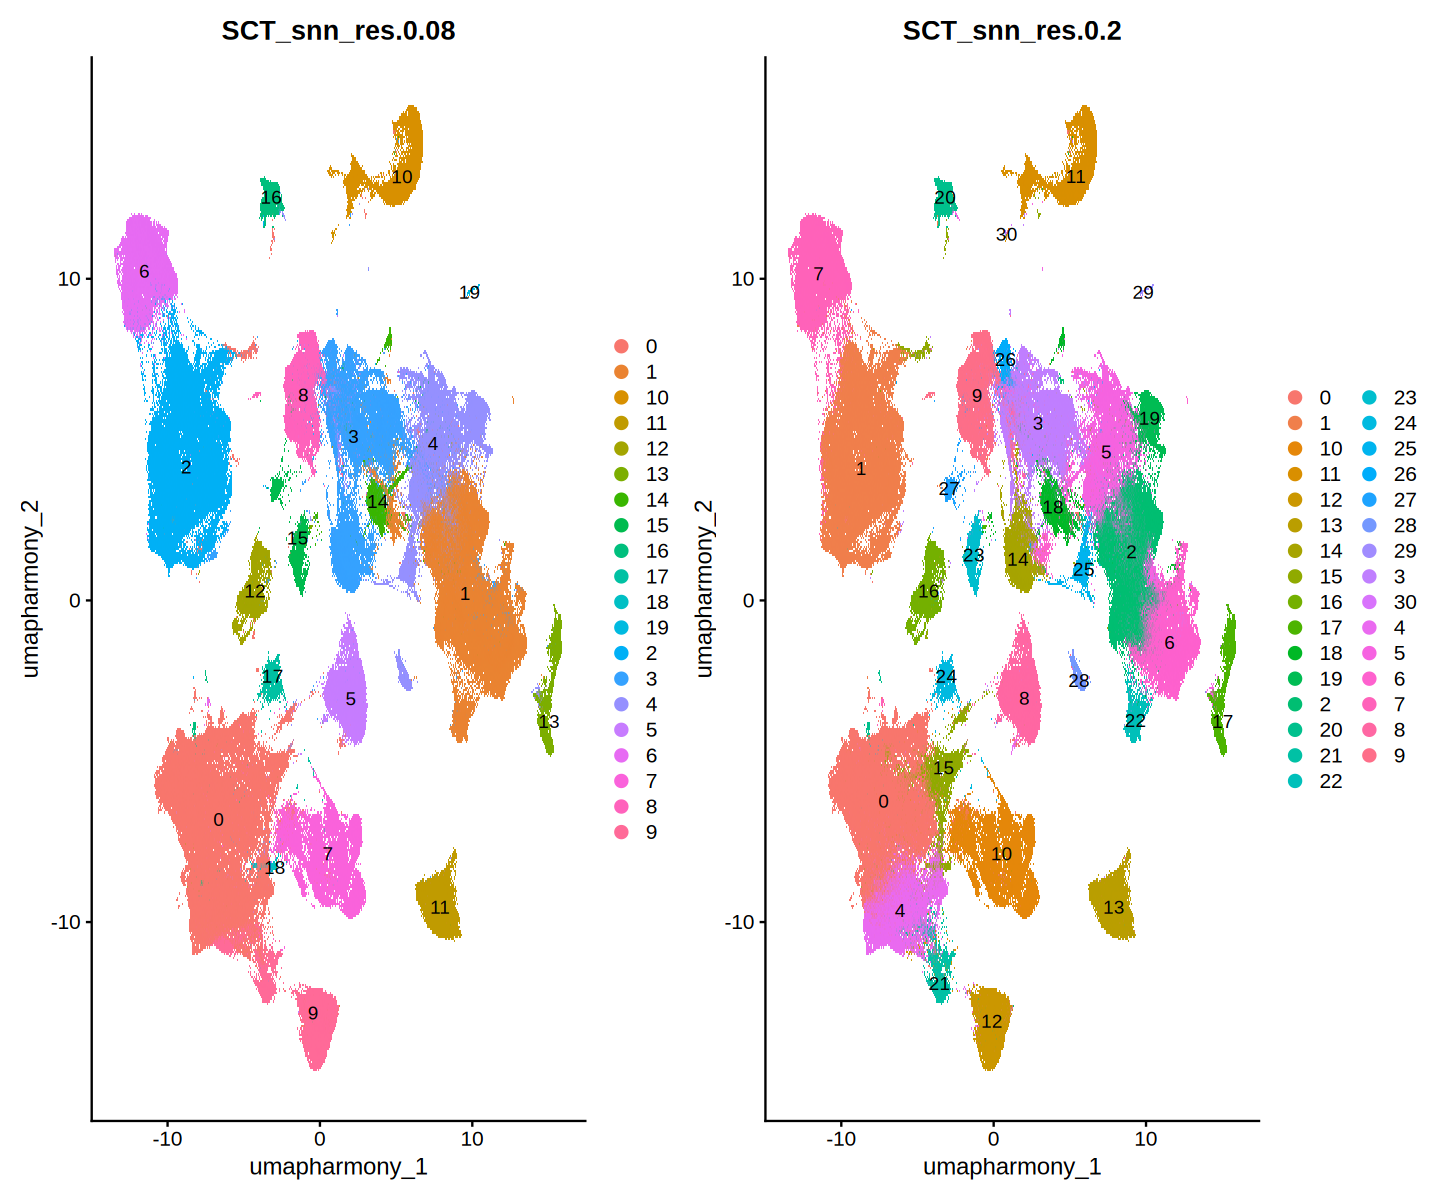

In [29]:
options(repr.plot.width = 12)
p1 <- DimPlot(obj, reduction = 'umap.harmony', group.by = 'SCT_snn_res.0.08', label = TRUE)
p2 <- DimPlot(obj, reduction = 'umap.harmony', group.by = 'SCT_snn_res.0.2', label = TRUE)
p1 | p2

In [11]:
Idents(obj) <- "SCT_snn_res.0.08"

In [12]:
# Prepare the SCT assay for DE analysis
# This is required when using multiple SCT models
obj <- PrepSCTFindMarkers(obj, assay = "SCT", verbose = TRUE)

Found 11 SCT models. Recorrecting SCT counts using minimum median counts: 1731



Warning message:
“The `slot` argument of `GetAssayData()` is deprecated as of SeuratObject 5.0.0.
ℹ Please use the `layer` argument instead.
ℹ The deprecated feature was likely used in the Seurat package.
  Please report the issue at <https://github.com/satijalab/seurat/issues>.”


In [51]:
# Find all markers for all clusters
all_markers <- FindAllMarkers(
  object = obj,
  assay = "SCT",
  only.pos = TRUE,
  min.pct = 0.25,
  logfc.threshold = 0.25,
  test.use = "wilcox"
)

Calculating cluster 0



Calculating cluster 1

Calculating cluster 10

Calculating cluster 11

Calculating cluster 12

Calculating cluster 13

Calculating cluster 14

Calculating cluster 15

Calculating cluster 16

Calculating cluster 17

Calculating cluster 18

Calculating cluster 19

Calculating cluster 2

Calculating cluster 3

Calculating cluster 4

Calculating cluster 5

Calculating cluster 6

Calculating cluster 7

Calculating cluster 8

Calculating cluster 9



In [ ]:
cluster0 <- all_markers %>% filter(cluster == 0) %>% arrange(desc(avg_log2FC))
cluster1 <- all_markers %>% filter(cluster == 1) %>% arrange(desc(avg_log2FC))
cluster2 <- all_markers %>% filter(cluster == 2) %>% arrange(desc(avg_log2FC))
cluster3 <- all_markers %>% filter(cluster == 3) %>% arrange(desc(avg_log2FC))
cluster4 <- all_markers %>% filter(cluster == 4) %>% arrange(desc(avg_log2FC))
cluster5 <- all_markers %>% filter(cluster == 5) %>% arrange(desc(avg_log2FC))
cluster6 <- all_markers %>% filter(cluster == 6) %>% arrange(desc(avg_log2FC))
cluster7 <- all_markers %>% filter(cluster == 7) %>% arrange(desc(avg_log2FC))
cluster8 <- all_markers %>% filter(cluster == 8) %>% arrange(desc(avg_log2FC))
cluster9 <- all_markers %>% filter(cluster == 9) %>% arrange(desc(avg_log2FC))
cluster10 <- all_markers %>% filter(cluster == 10) %>% arrange(desc(avg_log2FC))
cluster11 <- all_markers %>% filter(cluster == 11) %>% arrange(desc(avg_log2FC))
cluster12 <- all_markers %>% filter(cluster == 12) %>% arrange(desc(avg_log2FC))
cluster13 <- all_markers %>% filter(cluster == 13) %>% arrange(desc(avg_log2FC))
cluster14 <- all_markers %>% filter(cluster == 14) %>% arrange(desc(avg_log2FC))
cluster15 <- all_markers %>% filter(cluster == 15) %>% arrange(desc(avg_log2FC))
cluster16 <- all_markers %>% filter(cluster == 16) %>% arrange(desc(avg_log2FC))
cluster17 <- all_markers %>% filter(cluster == 17) %>% arrange(desc(avg_log2FC))
cluster18 <- all_markers %>% filter(cluster == 18) %>% arrange(desc(avg_log2FC))
cluster19 <- all_markers %>% filter(cluster == 19) %>% arrange(desc(avg_log2FC))

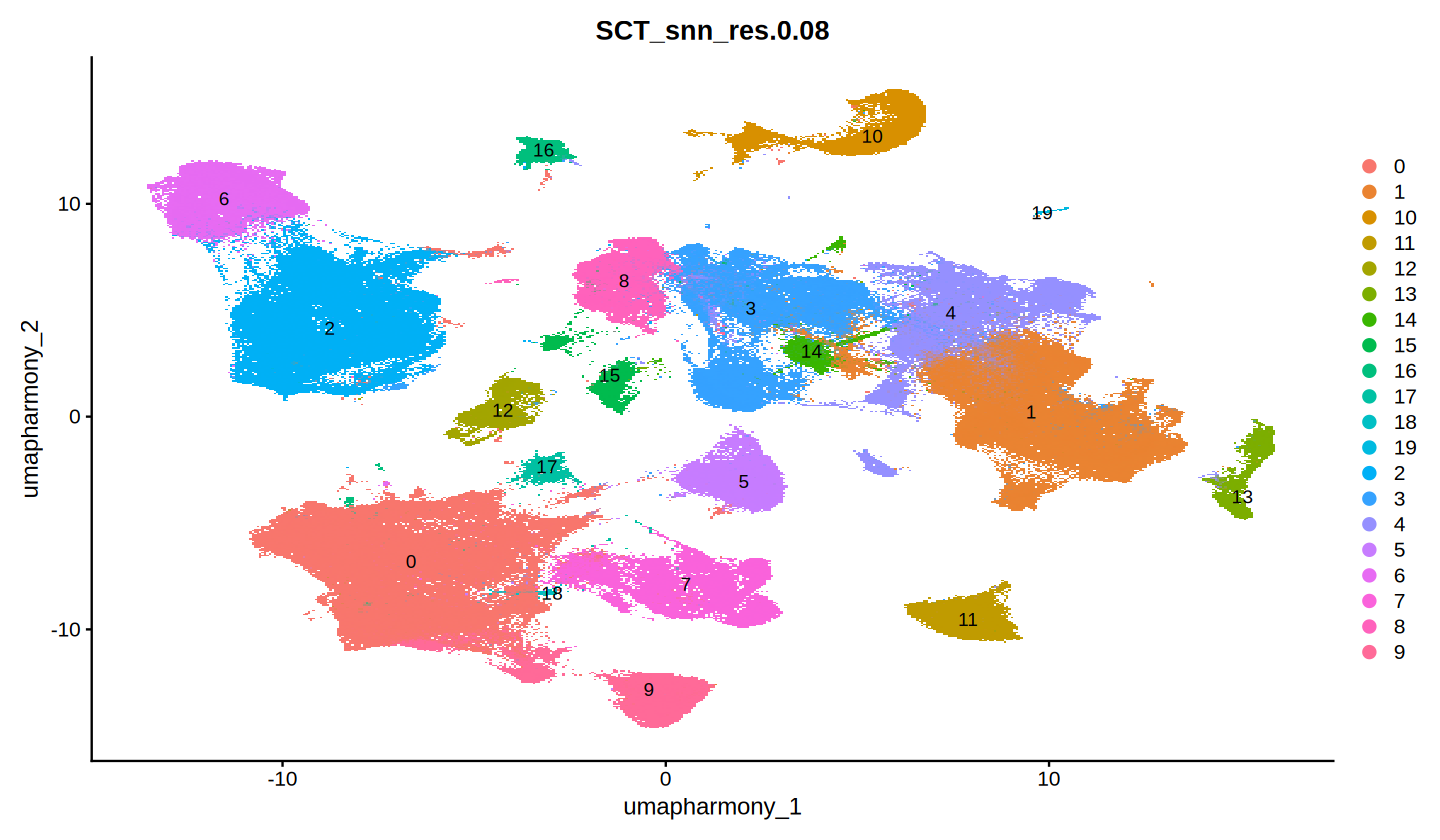

In [17]:
p2

In [15]:
cluster0 |> head(10)
cluster1 |> head(10)
cluster2 |> head(10)
cluster3 |> head(10)
cluster4 |> head(10)
cluster5 |> head(10)
cluster6 |> head(10)
cluster7 |> head(10)
cluster8 |> head(10)
cluster9 |> head(10)
cluster10 |> head(10)

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
TREM2,0,6.119851,0.422,0.009,0,0,TREM2
CCL3L3,0,5.944777,0.308,0.020,0,0,CCL3L3
OLR1,0,5.939584,0.386,0.009,0,0,OLR1
C3,0,5.830159,0.455,0.017,0,0,C3
FCGBP,0,5.823470,0.290,0.015,0,0,FCGBP
C1QC,0,5.794099,0.591,0.023,0,0,C1QC
SLC2A5,0,5.751807,0.256,0.006,0,0,SLC2A5
VSIG4,0,5.587805,0.352,0.008,0,0,VSIG4
C1QB,0,5.553908,0.632,0.033,0,0,C1QB


,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
CSMD1,0,4.123061,0.429,0.073,0,1,CSMD1
NXPH1,0,4.111010,0.292,0.036,0,1,NXPH1
TNR,0,4.102935,0.361,0.041,0,1,TNR
OPCML,0,3.954151,0.339,0.045,0,1,OPCML
FGF12,0,3.895253,0.371,0.060,0,1,FGF12
PCDH15,0,3.756414,0.317,0.048,0,1,PCDH15
TMEM132B,0,3.627936,0.310,0.033,0,1,TMEM132B
NTRK3,0,3.625991,0.287,0.028,0,1,NTRK3
CSMD3,0,3.615700,0.383,0.053,0,1,CSMD3


,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
GZMK,0,5.383468,0.305,0.012,0,2,GZMK
THEMIS,0,4.943409,0.443,0.021,0,2,THEMIS
CD8A,0,4.560618,0.299,0.016,0,2,CD8A
CD8B,0,4.411542,0.269,0.014,0,2,CD8B
CD6,0,4.293930,0.323,0.019,0,2,CD6
CD3G,0,4.245918,0.463,0.026,0,2,CD3G
BCL11B,0,4.221925,0.626,0.049,0,2,BCL11B
IL7R,0,4.208114,0.507,0.043,0,2,IL7R
ITK,0,4.081413,0.451,0.034,0,2,ITK


,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
CENPF1,0,3.208380,0.321,0.079,0,3,CENPF
DANCR2,0,3.176289,0.295,0.100,0,3,DANCR
TOP2A1,0,3.105897,0.290,0.062,0,3,TOP2A
NUSAP1,0,3.051893,0.263,0.051,0,3,NUSAP1
MIR9-1HG2,0,3.036820,0.395,0.130,0,3,MIR9-1HG
UCHL11,0,2.964110,0.346,0.095,0,3,UCHL1
TUBB2B2,0,2.886509,0.407,0.109,0,3,TUBB2B
BEX11,0,2.859494,0.335,0.061,0,3,BEX1
HES62,0,2.754181,0.273,0.063,0,3,HES6


,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
CLU3,0,3.886261,0.668,0.191,0,4,CLU
GFAP3,0,3.771989,0.320,0.064,0,4,GFAP
MT33,0,3.464514,0.437,0.106,0,4,MT3
IGFBP51,0,3.306809,0.325,0.068,0,4,IGFBP5
SPARCL14,0,3.263272,0.551,0.112,0,4,SPARCL1
ID41,0,3.249506,0.312,0.052,0,4,ID4
SERPINE22,0,3.150070,0.346,0.091,0,4,SERPINE2
VEGFA3,0,3.052589,0.358,0.101,0,4,VEGFA
CPE2,0,2.872499,0.331,0.082,0,4,CPE


,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
VCX,0,10.248456,0.658,0.001,0,5,VCX
VCX3A,0,9.981359,0.477,0.000,0,5,VCX3A
LINC01029,0,9.738021,0.271,0.000,0,5,LINC01029
LINC01885,0,7.811655,0.339,0.001,0,5,LINC01885
ENSG00000284837,0,7.673016,0.399,0.002,0,5,ENSG00000284837
MAGEA4,0,7.194056,0.537,0.004,0,5,MAGEA4
ENSG00000260289,0,7.115015,0.277,0.002,0,5,ENSG00000260289
PLEK21,0,6.823928,0.390,0.004,0,5,PLEK2
TM4SF11,0,6.733324,0.917,0.025,0,5,TM4SF1


,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
GNLY,0,7.268726,0.996,0.044,0,6,GNLY
SH2D1B,0,6.776509,0.283,0.003,0,6,SH2D1B
KLRF1,0,6.721604,0.617,0.008,0,6,KLRF1
NCR1,0,6.248652,0.254,0.003,0,6,NCR1
FGFBP2,0,6.032285,0.691,0.018,0,6,FGFBP2
KLRC1,0,5.840860,0.303,0.006,0,6,KLRC1
TRDC,0,5.811682,0.492,0.009,0,6,TRDC
CLIC3,0,5.582137,0.476,0.014,0,6,CLIC3
PRF1,0,5.498699,0.779,0.033,0,6,PRF1


,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
S100A121,0,7.184498,0.827,0.015,0,7,S100A12
S100A8,0,6.763789,0.989,0.073,0,7,S100A8
S100A9,0,6.370384,0.994,0.105,0,7,S100A9
CD36,0,5.603636,0.579,0.018,0,7,CD36
ENSG00000257764,0,5.253268,0.503,0.018,0,7,ENSG00000257764
LYZ1,0,5.180877,0.869,0.088,0,7,LYZ
CDA,0,5.061139,0.327,0.011,0,7,CDA
FCN11,0,5.019598,0.832,0.036,0,7,FCN1
FCAR,0,4.674230,0.252,0.011,0,7,FCAR


,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
CCR7,0,4.053510,0.362,0.023,0,8,CCR7
LTB2,0,3.580941,0.839,0.089,0,8,LTB
TRAC1,0,3.309483,0.702,0.081,0,8,TRAC
FLT3LG,0,3.224933,0.316,0.036,0,8,FLT3LG
PRKCQ-AS1,0,3.200851,0.346,0.042,0,8,PRKCQ-AS1
CD271,0,2.955724,0.319,0.036,0,8,CD27
RPL315,0,2.842758,0.978,0.499,0,8,RPL31
TRBC22,0,2.784359,0.520,0.088,0,8,TRBC2
TCF71,0,2.684122,0.353,0.056,0,8,TCF7


,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
CXCL10,0,5.927413,0.328,0.011,0,9,CXCL10
IFI272,0,5.506084,0.934,0.082,0,9,IFI27
ISG15,0,5.316058,0.989,0.186,0,9,ISG15
RSAD2,0,5.170713,0.668,0.031,0,9,RSAD2
IFIT1,0,5.012583,0.810,0.045,0,9,IFIT1
IFIT3,0,4.576529,0.809,0.061,0,9,IFIT3
MX1,0,4.363222,0.897,0.101,0,9,MX1
OASL,0,4.300380,0.494,0.034,0,9,OASL
IFIH1,0,4.251244,0.520,0.038,0,9,IFIH1


,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
OPALIN,0,8.886417,0.318,0.001,0,10,OPALIN
ENSG00000286749,0,8.689145,0.461,0.003,0,10,ENSG00000286749
MAG,0,8.412346,0.639,0.004,0,10,MAG
ENSG00000289591,0,8.344393,0.302,0.001,0,10,ENSG00000289591
KLK6,0,8.285029,0.404,0.002,0,10,KLK6
MOG,0,8.273907,0.678,0.004,0,10,MOG
CNDP1,0,8.039236,0.706,0.007,0,10,CNDP1
PRR18,0,7.986954,0.255,0.001,0,10,PRR18
HAPLN2,0,7.955888,0.463,0.003,0,10,HAPLN2


In [16]:
cluster11 |> head(10)
cluster12 |> head(10)
cluster13 |> head(10)
cluster14 |> head(10)
cluster15 |> head(10)
cluster16 |> head(10)
cluster17 |> head(10)
cluster18 |> head(10)
cluster19 |> head(10)

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
SEC61G-DT,0,9.648466,0.923,0.004,0,11,SEC61G-DT
H2BC9,0,5.678941,0.319,0.007,0,11,H2BC9
SEC61G,0,4.851090,0.989,0.285,0,11,SEC61G
TENM3,0,4.618355,0.848,0.045,0,11,TENM3
LINC01036,0,4.510104,0.468,0.021,0,11,LINC01036
COL23A1,0,4.437992,0.447,0.018,0,11,COL23A1
PRAME,0,4.385747,0.515,0.026,0,11,PRAME
ENSG00000258081,0,4.221734,0.907,0.059,0,11,ENSG00000258081
MYC,0,4.187823,0.741,0.067,0,11,MYC


,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
FCRL1,0,10.224451,0.496,0.001,0,12,FCRL1
TCL1A,0,9.694000,0.398,0.001,0,12,TCL1A
CD79A,0,9.594113,0.857,0.004,0,12,CD79A
MS4A1,0,9.434864,0.764,0.002,0,12,MS4A1
VPREB3,0,8.938470,0.389,0.001,0,12,VPREB3
IGHD,0,8.919414,0.579,0.001,0,12,IGHD
FCER2,0,8.846465,0.336,0.001,0,12,FCER2
BANK1,0,8.754345,0.808,0.007,0,12,BANK1
IGHM,0,8.680019,0.763,0.006,0,12,IGHM


,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
COL3A1,0,9.165161,0.274,0.002,0,13,COL3A1
COL1A1,0,8.384341,0.259,0.003,0,13,COL1A1
COL1A2,0,7.382972,0.361,0.008,0,13,COL1A2
DCN,0,7.012750,0.338,0.007,0,13,DCN
TAGLN,0,7.006398,0.283,0.019,0,13,TAGLN
BGN,0,6.663721,0.345,0.013,0,13,BGN
RGS5,0,6.469385,0.289,0.013,0,13,RGS5
MYL9,0,6.465932,0.280,0.011,0,13,MYL9
PDGFRB,0,6.334402,0.272,0.007,0,13,PDGFRB


,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
GAPDHS,0,8.139568,0.392,0.002,0,14,GAPDHS
LINC00681,0,8.113822,0.458,0.002,0,14,LINC00681
DCT,0,7.957085,0.804,0.012,0,14,DCT
TRPM1,0,7.382771,0.413,0.004,0,14,TRPM1
ENSG00000255429,0,7.304248,0.372,0.002,0,14,ENSG00000255429
PMEL,0,7.267349,0.744,0.010,0,14,PMEL
TRIM63,0,7.239779,0.272,0.002,0,14,TRIM63
TYR,0,7.184484,0.682,0.006,0,14,TYR
OCA2,0,7.124503,0.281,0.003,0,14,OCA2


,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
CLDN5,0,9.798437,0.655,0.006,0,15,CLDN5
VWF,0,9.376353,0.515,0.004,0,15,VWF
SRARP,0,9.072079,0.304,0.001,0,15,SRARP
CLEC14A,0,8.990629,0.295,0.001,0,15,CLEC14A
TM4SF18,0,8.613842,0.262,0.001,0,15,TM4SF18
TIE1,0,8.533049,0.392,0.002,0,15,TIE1
ROBO4,0,8.347879,0.334,0.002,0,15,ROBO4
CD34,0,8.318301,0.318,0.001,0,15,CD34
CAVIN2,0,8.248763,0.597,0.008,0,15,CAVIN2


,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
ENSG000002899014,0.000000e+00,3.492606,0.735,0.456,0.000000e+00,16,ENSG00000289901
ENSG000002894742,4.204972e-305,3.045403,0.472,0.267,1.515346e-300,16,ENSG00000289474
MT-ND32,0.000000e+00,2.655540,0.982,0.861,0.000000e+00,16,MT-ND3
MT-ND21,0.000000e+00,2.653524,0.939,0.829,0.000000e+00,16,MT-ND2
MT-ND12,0.000000e+00,2.597111,0.959,0.847,0.000000e+00,16,MT-ND1
MT-ND4L4,0.000000e+00,2.596040,0.573,0.345,0.000000e+00,16,MT-ND4L
MT-ND52,0.000000e+00,2.422411,0.826,0.670,0.000000e+00,16,MT-ND5
MT-ATP62,0.000000e+00,2.157320,0.987,0.900,0.000000e+00,16,MT-ATP6
MT-CO32,0.000000e+00,2.138584,0.997,0.938,0.000000e+00,16,MT-CO3


,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
ADGRG3,0,6.161383,0.421,0.008,0,17,ADGRG3
FCGR3B,0,5.909858,0.280,0.005,0,17,FCGR3B
IL1R2,0,5.630961,0.451,0.014,0,17,IL1R2
ENSG00000288700,0,5.550062,0.319,0.015,0,17,ENSG00000288700
AQP9,0,5.143383,0.574,0.034,0,17,AQP9
NAMPT2,0,5.006183,0.962,0.259,0,17,NAMPT
ENSG00000188897,0,4.958888,0.302,0.022,0,17,ENSG00000188897
GLT1D1,0,4.894017,0.427,0.029,0,17,GLT1D1
PTGS2,0,4.846740,0.388,0.030,0,17,PTGS2


,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
LYPD2,0,7.351592,0.293,0.002,0,18,LYPD2
ENSG00000249988,0,6.058466,0.278,0.004,0,18,ENSG00000249988
PELATON,0,5.972872,0.916,0.032,0,18,PELATON
ADGRE3,0,5.353738,0.297,0.008,0,18,ADGRE3
CDKN1C1,0,5.337738,0.817,0.046,0,18,CDKN1C
LINC02432,0,5.238723,0.564,0.016,0,18,LINC02432
LILRB2,0,4.821992,0.714,0.034,0,18,LILRB2
FAM110A,0,4.809335,0.440,0.019,0,18,FAM110A
PECAM11,0,4.700919,0.857,0.070,0,18,PECAM1


,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
MMP9,0.000000e+00,6.433283,0.383,0.005,0.000000e+00,19,MMP9
SIX6,0.000000e+00,5.461098,0.289,0.006,0.000000e+00,19,SIX6
PCDHGA12,0.000000e+00,5.401931,0.297,0.007,0.000000e+00,19,PCDHGA12
PCDHGA11,0.000000e+00,5.171764,0.344,0.009,0.000000e+00,19,PCDHGA11
TTC9B,0.000000e+00,4.755524,0.594,0.020,0.000000e+00,19,TTC9B
HOXC10,0.000000e+00,4.674768,0.273,0.012,0.000000e+00,19,HOXC10
TAGLN1,0.000000e+00,4.566803,0.789,0.022,0.000000e+00,19,TAGLN
SOX15,1.893975e-304,4.476322,0.262,0.011,6.825319e-300,19,SOX15
C11orf98,0.000000e+00,4.449203,0.316,0.014,0.000000e+00,19,C11orf98


In [ ]:
# Cluster 5: Oligodendrocytes; Markers: CARNS1, MOG, SLC5A11, CNDP1, HAPLN2, CNTN2

In [21]:
obj

An object of class Seurat 
74643 features across 375000 samples within 2 assays 
Active assay: SCT (36037 features, 3000 variable features)
 3 layers present: counts, data, scale.data
 1 other assay present: RNA
 4 dimensional reductions calculated: pca, umap, harmony, umap.harmony

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To di

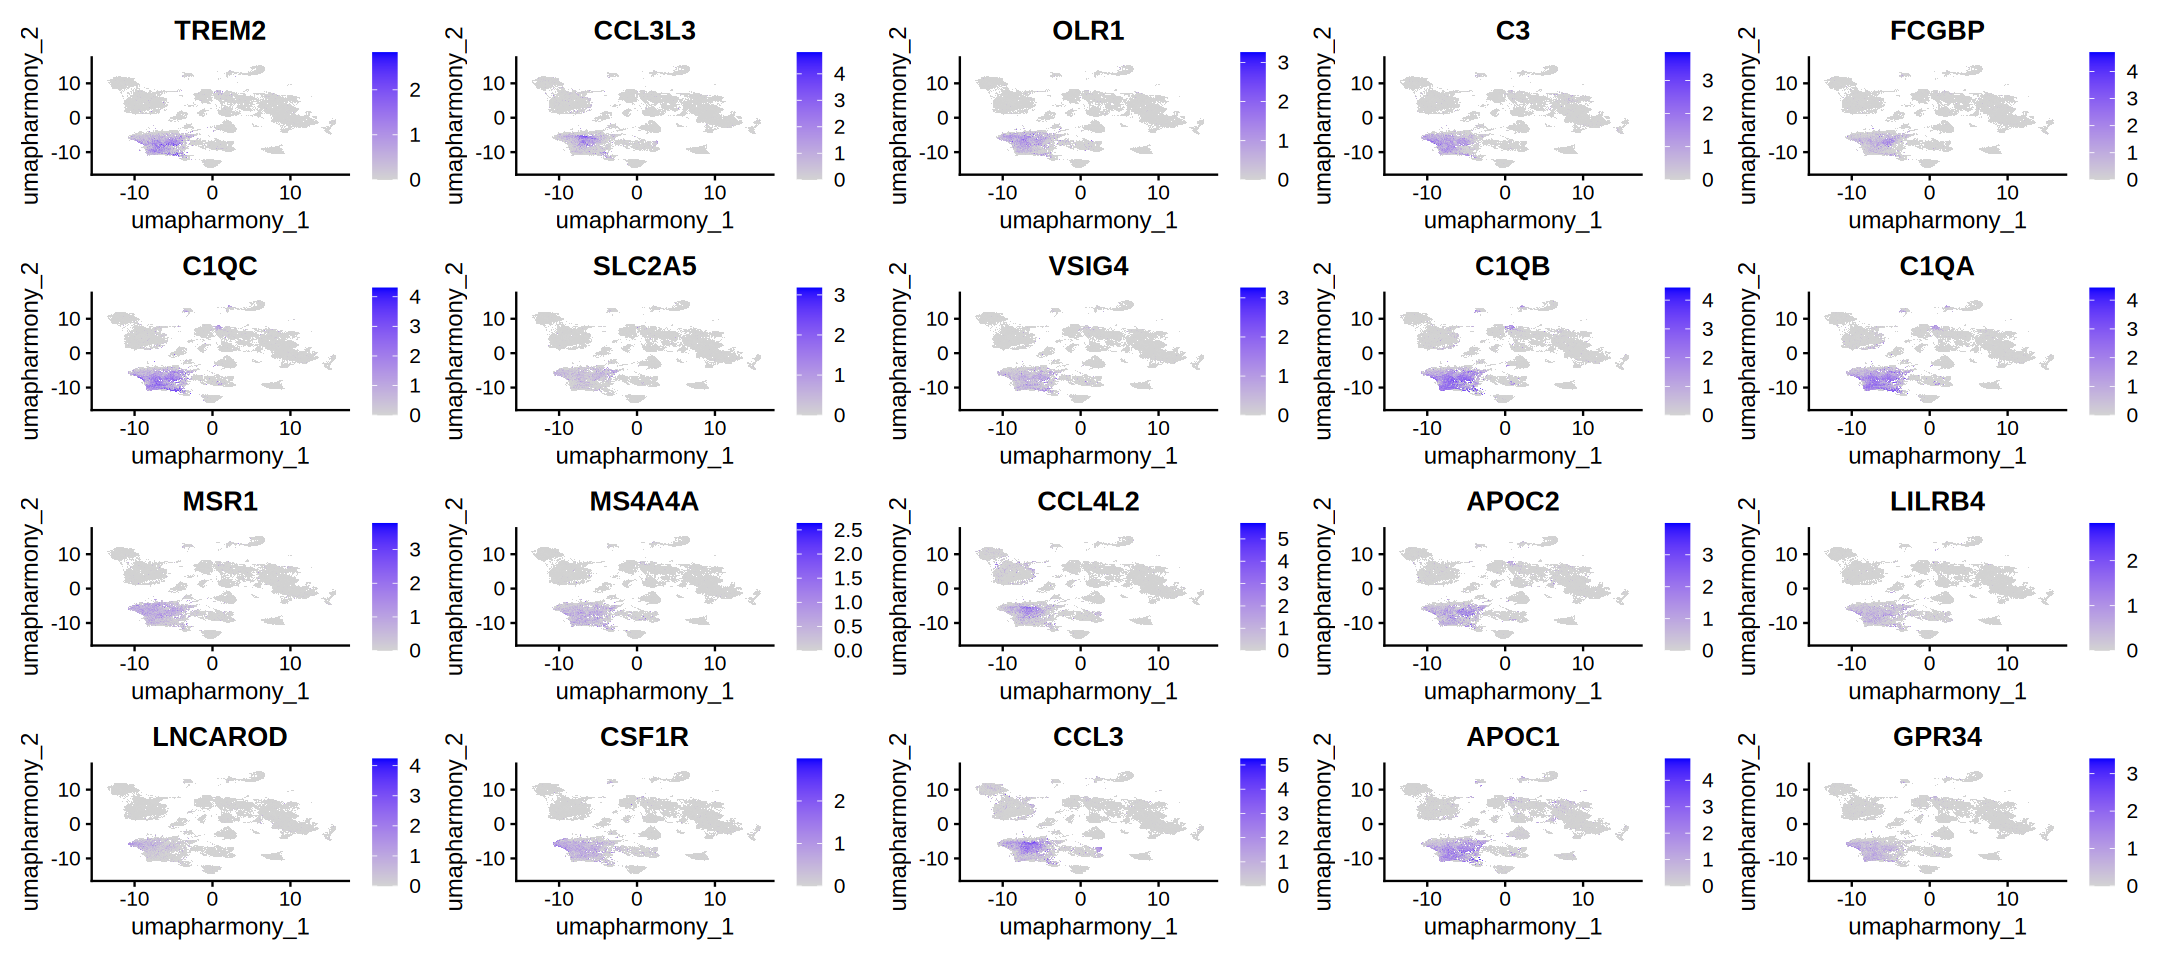

In [39]:
# Get top 6 markers from cluster 0
top_markers <- cluster0$gene[1:20]

# Create feature plots with custom settings
options(repr.plot.width = 18, repr.plot.height = 8)
p3 <- FeaturePlot(obj, 
            features = top_markers,
            reduction = "umap.harmony",
            ncol = 5)
p3

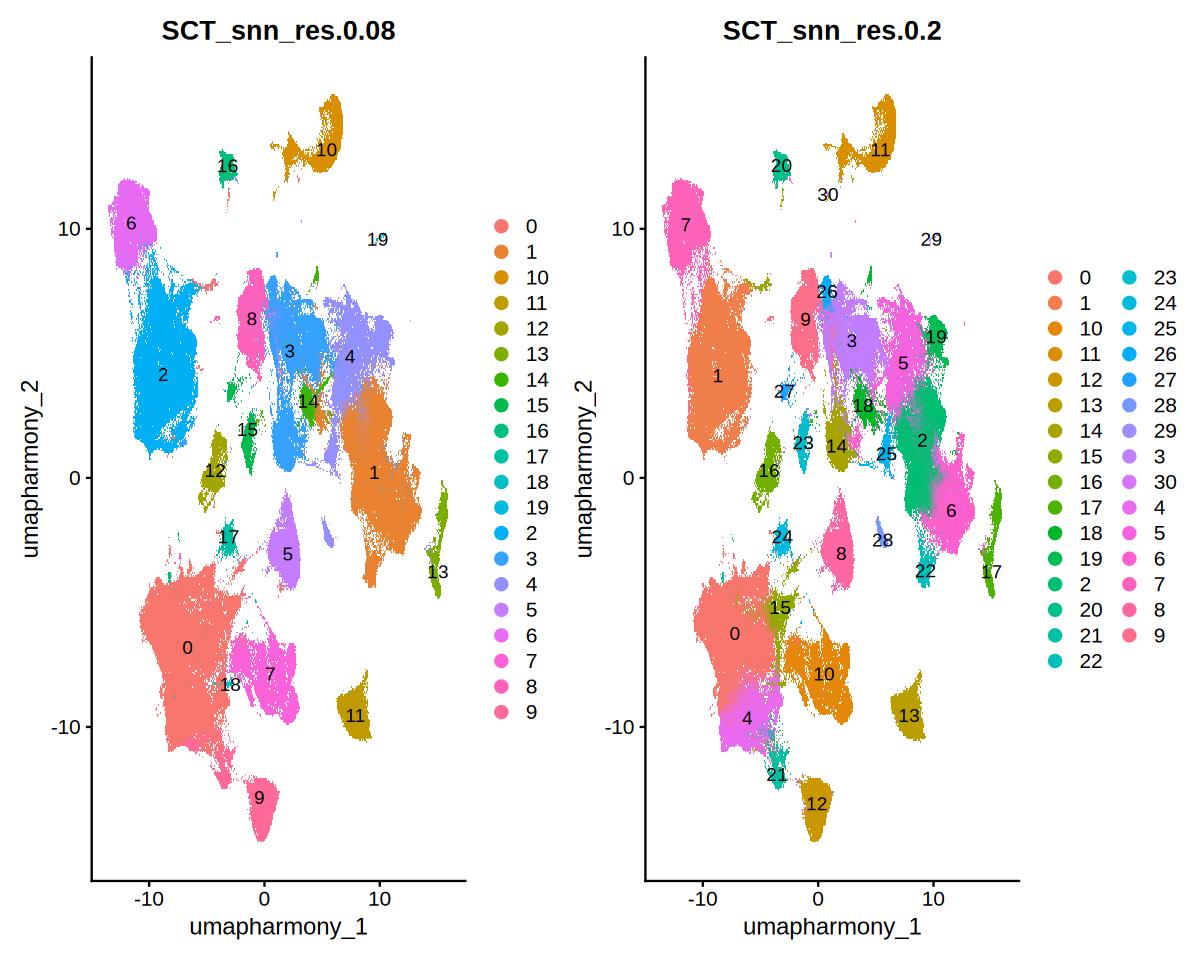

In [38]:
options(repr.plot.width = 10, repr.plot.height = 8)
p1 | p2

In [40]:
obj_2 <- obj

In [41]:
Idents(obj_2) <- "SCT_snn_res.0.2"

In [42]:
obj_2 <- PrepSCTFindMarkers(obj_2, assay = "SCT", verbose = TRUE)

Found 11 SCT models. Recorrecting SCT counts using minimum median counts: 1731



In [ ]:
# Find all markers for all clusters
all_markers <- FindAllMarkers(
  object = obj_2,
  assay = "SCT",
  only.pos = TRUE,
  min.pct = 0.25,
  logfc.threshold = 0.25,
  test.use = "wilcox"
)

Calculating cluster 0

Calculating cluster 1

Calculating cluster 10

Calculating cluster 11

Calculating cluster 12

Calculating cluster 13

Calculating cluster 14

Calculating cluster 15

Calculating cluster 16

Calculating cluster 17

Calculating cluster 18

Calculating cluster 19

Calculating cluster 2

Calculating cluster 20

Calculating cluster 21

Calculating cluster 22

Calculating cluster 23

Calculating cluster 24

Calculating cluster 25

Calculating cluster 26

Calculating cluster 27

Calculating cluster 28

Calculating cluster 29

Calculating cluster 3

Calculating cluster 30

Calculating cluster 4

Calculating cluster 5

Calculating cluster 6

Calculating cluster 7

Calculating cluster 8

Calculating cluster 9



In [44]:
cluster0 <- all_markers %>% filter(cluster == 0) %>% arrange(desc(avg_log2FC))
cluster1 <- all_markers %>% filter(cluster == 1) %>% arrange(desc(avg_log2FC))
cluster2 <- all_markers %>% filter(cluster == 2) %>% arrange(desc(avg_log2FC))
cluster3 <- all_markers %>% filter(cluster == 3) %>% arrange(desc(avg_log2FC))
cluster4 <- all_markers %>% filter(cluster == 4) %>% arrange(desc(avg_log2FC))
cluster5 <- all_markers %>% filter(cluster == 5) %>% arrange(desc(avg_log2FC))
cluster6 <- all_markers %>% filter(cluster == 6) %>% arrange(desc(avg_log2FC))
cluster7 <- all_markers %>% filter(cluster == 7) %>% arrange(desc(avg_log2FC))
cluster8 <- all_markers %>% filter(cluster == 8) %>% arrange(desc(avg_log2FC))
cluster9 <- all_markers %>% filter(cluster == 9) %>% arrange(desc(avg_log2FC))
cluster10 <- all_markers %>% filter(cluster == 10) %>% arrange(desc(avg_log2FC))
cluster11 <- all_markers %>% filter(cluster == 11) %>% arrange(desc(avg_log2FC))
cluster12 <- all_markers %>% filter(cluster == 12) %>% arrange(desc(avg_log2FC))
cluster13 <- all_markers %>% filter(cluster == 13) %>% arrange(desc(avg_log2FC))
cluster14 <- all_markers %>% filter(cluster == 14) %>% arrange(desc(avg_log2FC))
cluster15 <- all_markers %>% filter(cluster == 15) %>% arrange(desc(avg_log2FC))
cluster16 <- all_markers %>% filter(cluster == 16) %>% arrange(desc(avg_log2FC))
cluster17 <- all_markers %>% filter(cluster == 17) %>% arrange(desc(avg_log2FC))
cluster18 <- all_markers %>% filter(cluster == 18) %>% arrange(desc(avg_log2FC))
cluster19 <- all_markers %>% filter(cluster == 19) %>% arrange(desc(avg_log2FC))
cluster20 <- all_markers %>% filter(cluster == 20) %>% arrange(desc(avg_log2FC))
cluster21 <- all_markers %>% filter(cluster == 21) %>% arrange(desc(avg_log2FC))
cluster22 <- all_markers %>% filter(cluster == 22) %>% arrange(desc(avg_log2FC))
cluster23 <- all_markers %>% filter(cluster == 23) %>% arrange(desc(avg_log2FC))
cluster24 <- all_markers %>% filter(cluster == 24) %>% arrange(desc(avg_log2FC))
cluster25 <- all_markers %>% filter(cluster == 25) %>% arrange(desc(avg_log2FC))
cluster26 <- all_markers %>% filter(cluster == 26) %>% arrange(desc(avg_log2FC))
cluster27 <- all_markers %>% filter(cluster == 27) %>% arrange(desc(avg_log2FC))
cluster28 <- all_markers %>% filter(cluster == 28) %>% arrange(desc(avg_log2FC))
cluster29 <- all_markers %>% filter(cluster == 29) %>% arrange(desc(avg_log2FC))
cluster30 <- all_markers %>% filter(cluster == 30) %>% arrange(desc(avg_log2FC))

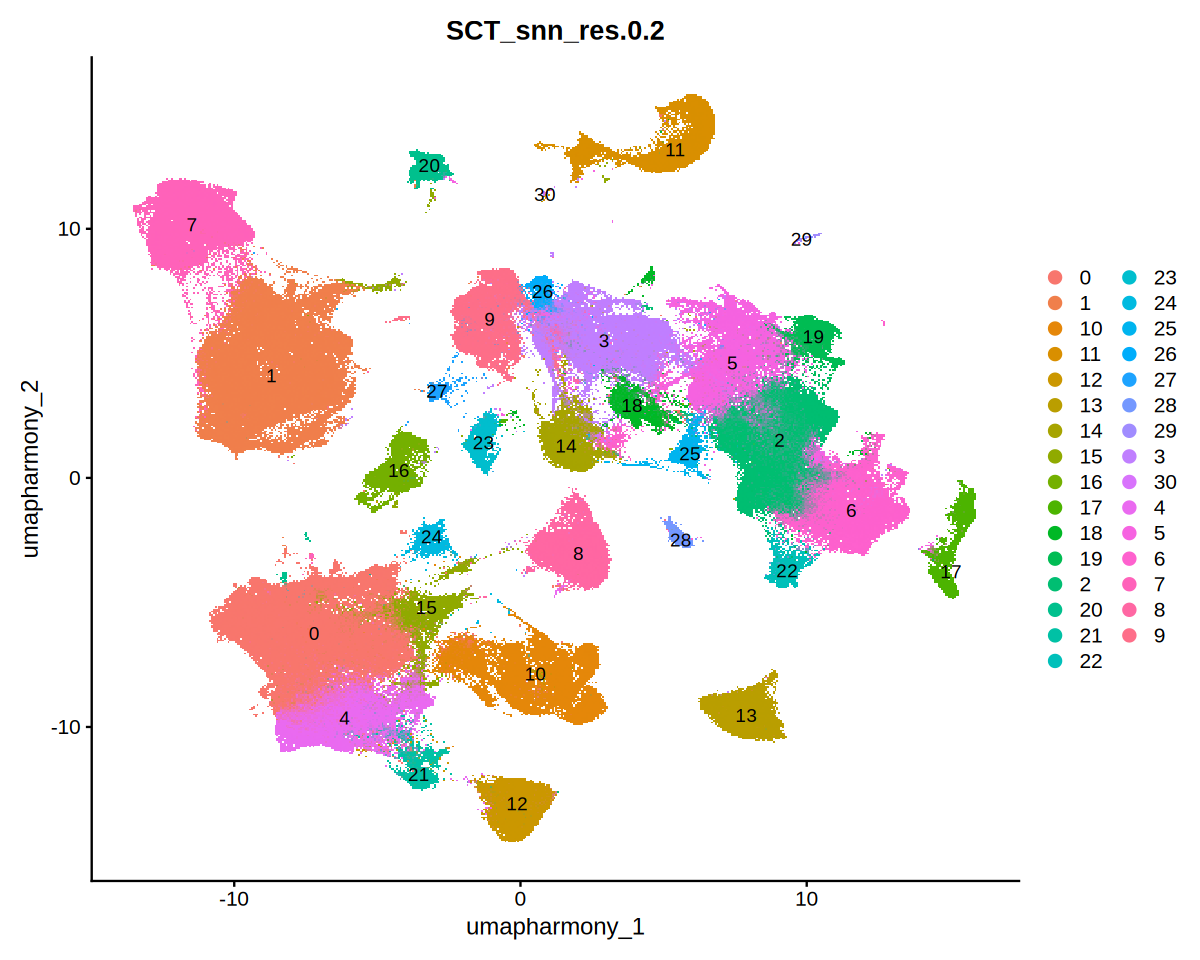

In [47]:
options(repr.plot.width = 10, repr.plot.height = 8)
p2

In [68]:
cluster0 |> head(15)
cluster1 |> head(10)
cluster2 |> head(10)
cluster3 |> head(10)
cluster4 |> head(15)
cluster5 |> head(10)
cluster6 |> head(10)
cluster7 |> head(10)
cluster8 |> head(10)
cluster9 |> head(10)
cluster10 |> head(10)

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
CCL3L3,0,5.572090,0.403,0.030,0,0,CCL3L3
LNCAROD,0,5.167312,0.354,0.019,0,0,LNCAROD
CCL4L2,0,5.075616,0.406,0.044,0,0,CCL4L2
OLR1,0,4.861176,0.492,0.025,0,0,OLR1
CCL3,0,4.628840,0.552,0.070,0,0,CCL3
IL1B,0,4.513687,0.371,0.033,0,0,IL1B
MSR1,0,4.415903,0.589,0.043,0,0,MSR1
FCGBP,0,4.359518,0.338,0.031,0,0,FCGBP
NR4A3,0,4.345701,0.327,0.035,0,0,NR4A3


,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
GZMK,0,5.284323,0.304,0.013,0,1,GZMK
THEMIS,0,4.830617,0.443,0.022,0,1,THEMIS
CD8A,0,4.382952,0.296,0.017,0,1,CD8A
CD8B,0,4.288736,0.266,0.014,0,1,CD8B
CD6,0,4.256394,0.324,0.019,0,1,CD6
BCL11B,0,4.191338,0.627,0.050,0,1,BCL11B
IL7R,0,4.155451,0.509,0.043,0,1,IL7R
CD3G,0,4.123972,0.460,0.027,0,1,CD3G
BICDL1,0,4.046073,0.253,0.022,0,1,BICDL1


,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
RGS6,0,3.445649,0.254,0.054,0,2,RGS6
SLC4A41,0,3.231636,0.348,0.079,0,2,SLC4A4
PPARGC1A2,0,3.194357,0.305,0.034,0,2,PPARGC1A
ENSG00000225649,0,3.187626,0.380,0.053,0,2,ENSG00000225649
GABRG32,0,3.168711,0.381,0.051,0,2,GABRG3
TENM13,0,3.145109,0.614,0.106,0,2,TENM1
KLHL43,0,3.143447,0.497,0.076,0,2,KLHL4
CPNE42,0,3.142241,0.320,0.043,0,2,CPNE4
ADGRV12,0,3.135529,0.416,0.067,0,2,ADGRV1


,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
STMN22,0,4.267768,0.260,0.021,0,3,STMN2
CD242,0,4.048457,0.319,0.031,0,3,CD24
OLIG21,0,3.629674,0.271,0.037,0,3,OLIG2
DANCR2,0,3.603037,0.381,0.101,0,3,DANCR
MIR9-1HG2,0,3.474168,0.498,0.132,0,3,MIR9-1HG
UCHL14,0,3.265896,0.391,0.101,0,3,UCHL1
MLLT111,0,3.241823,0.266,0.034,0,3,MLLT11
MARCKSL17,0,3.137917,0.490,0.168,0,3,MARCKSL1
PCSK1N2,0,3.094645,0.366,0.071,0,3,PCSK1N


,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
HMOX14,0,3.363712,0.574,0.110,0,4,HMOX1
C1QA3,0,3.244450,0.655,0.116,0,4,C1QA
C1QC3,0,3.204350,0.601,0.107,0,4,C1QC
FTL5,0,3.201908,0.987,0.766,0,4,FTL
C1QB3,0,3.174713,0.647,0.121,0,4,C1QB
TREM22,0,3.007032,0.403,0.072,0,4,TREM2
APOC13,0,2.987268,0.601,0.130,0,4,APOC1
LST14,0,2.937526,0.541,0.125,0,4,LST1
HLA-DPA16,0,2.888008,0.788,0.204,0,4,HLA-DPA1


,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
AGT,0,5.218424,0.314,0.018,0,5,AGT
APOD2,0,4.830733,0.259,0.060,0,5,APOD
CLU6,0,4.158012,0.768,0.194,0,5,CLU
MT33,0,3.869532,0.592,0.103,0,5,MT3
TMEM1581,0,3.708917,0.250,0.035,0,5,TMEM158
IGFBP51,0,3.498068,0.393,0.069,0,5,IGFBP5
RBP12,0,3.488743,0.380,0.058,0,5,RBP1
VEGFA4,0,3.394690,0.392,0.104,0,5,VEGFA
SCG21,0,3.237137,0.275,0.049,0,5,SCG2


,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
MEGF11,0,5.062835,0.531,0.028,0,6,MEGF11
FGF124,0,4.891877,0.686,0.078,0,6,FGF12
TNR2,0,4.872971,0.736,0.056,0,6,TNR
FERMT1,0,4.785629,0.388,0.018,0,6,FERMT1
CEROX1,0,4.776164,0.487,0.036,0,6,CEROX1
NXPH12,0,4.742058,0.565,0.049,0,6,NXPH1
PCDH152,0,4.683345,0.692,0.057,0,6,PCDH15
CA102,0,4.637910,0.503,0.036,0,6,CA10
DSCAM4,0,4.572290,0.766,0.120,0,6,DSCAM


,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
GNLY,0,7.412958,0.992,0.041,0,7,GNLY
SH2D1B,0,6.921312,0.276,0.002,0,7,SH2D1B
KLRF1,0,6.783400,0.598,0.008,0,7,KLRF1
KLRC1,0,6.262252,0.306,0.005,0,7,KLRC1
FGFBP2,0,6.027387,0.670,0.018,0,7,FGFBP2
TRDC,0,5.902849,0.481,0.008,0,7,TRDC
CLIC31,0,5.704619,0.473,0.013,0,7,CLIC3
PRF1,0,5.552729,0.773,0.031,0,7,PRF1
GZMB1,0,5.521689,0.789,0.025,0,7,GZMB


,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
VCX,0,10.228084,0.647,0.001,0,8,VCX
VCX3A,0,9.960789,0.469,0.000,0,8,VCX3A
LINC01029,0,9.736954,0.267,0.000,0,8,LINC01029
LINC01885,0,7.791638,0.333,0.001,0,8,LINC01885
ENSG00000284837,0,7.651728,0.392,0.002,0,8,ENSG00000284837
MAGEA41,0,7.172081,0.529,0.004,0,8,MAGEA4
ENSG00000260289,0,7.096186,0.273,0.002,0,8,ENSG00000260289
PLEK21,0,6.803589,0.384,0.004,0,8,PLEK2
TM4SF12,0,6.709989,0.903,0.025,0,8,TM4SF1


,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
CCR7,0,4.033613,0.357,0.023,0,9,CCR7
LTB3,0,3.560563,0.828,0.089,0,9,LTB
TRAC1,0,3.289777,0.693,0.081,0,9,TRAC
FLT3LG,0,3.205419,0.312,0.036,0,9,FLT3LG
PRKCQ-AS1,0,3.181206,0.342,0.042,0,9,PRKCQ-AS1
CD271,0,2.935196,0.314,0.036,0,9,CD27
RPL319,0,2.830757,0.976,0.498,0,9,RPL31
TRBC22,0,2.764994,0.513,0.088,0,9,TRBC2
TCF71,0,2.664183,0.348,0.056,0,9,TCF7


,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
S100A12,0,7.154820,0.826,0.016,0,10,S100A12
S100A8,0,6.742055,0.989,0.073,0,10,S100A8
S100A9,0,6.354495,0.994,0.105,0,10,S100A9
CD36,0,5.604906,0.580,0.018,0,10,CD36
ENSG00000257764,0,5.251731,0.503,0.018,0,10,ENSG00000257764
LYZ1,0,5.179684,0.869,0.088,0,10,LYZ
CDA,0,5.054071,0.327,0.011,0,10,CDA
FCN1,0,5.017208,0.831,0.036,0,10,FCN1
FCAR,0,4.669509,0.251,0.011,0,10,FCAR


Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



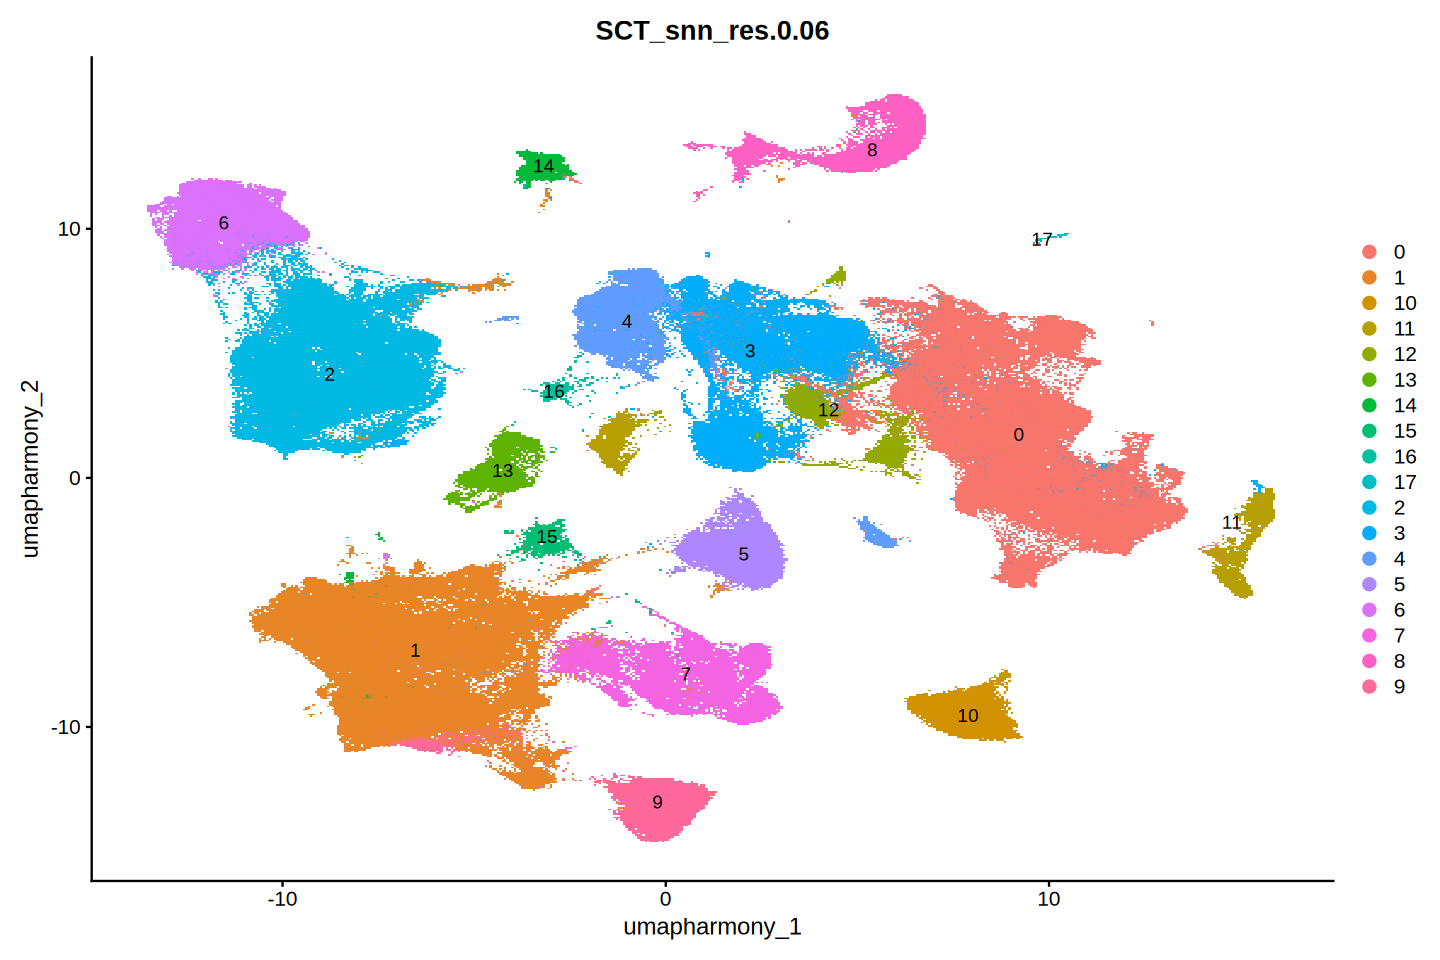

In [79]:
options(repr.plot.width = 12, repr.plot.height = 8)
DimPlot(obj, reduction = 'umap.harmony', group.by = 'SCT_snn_res.0.06', label = TRUE)

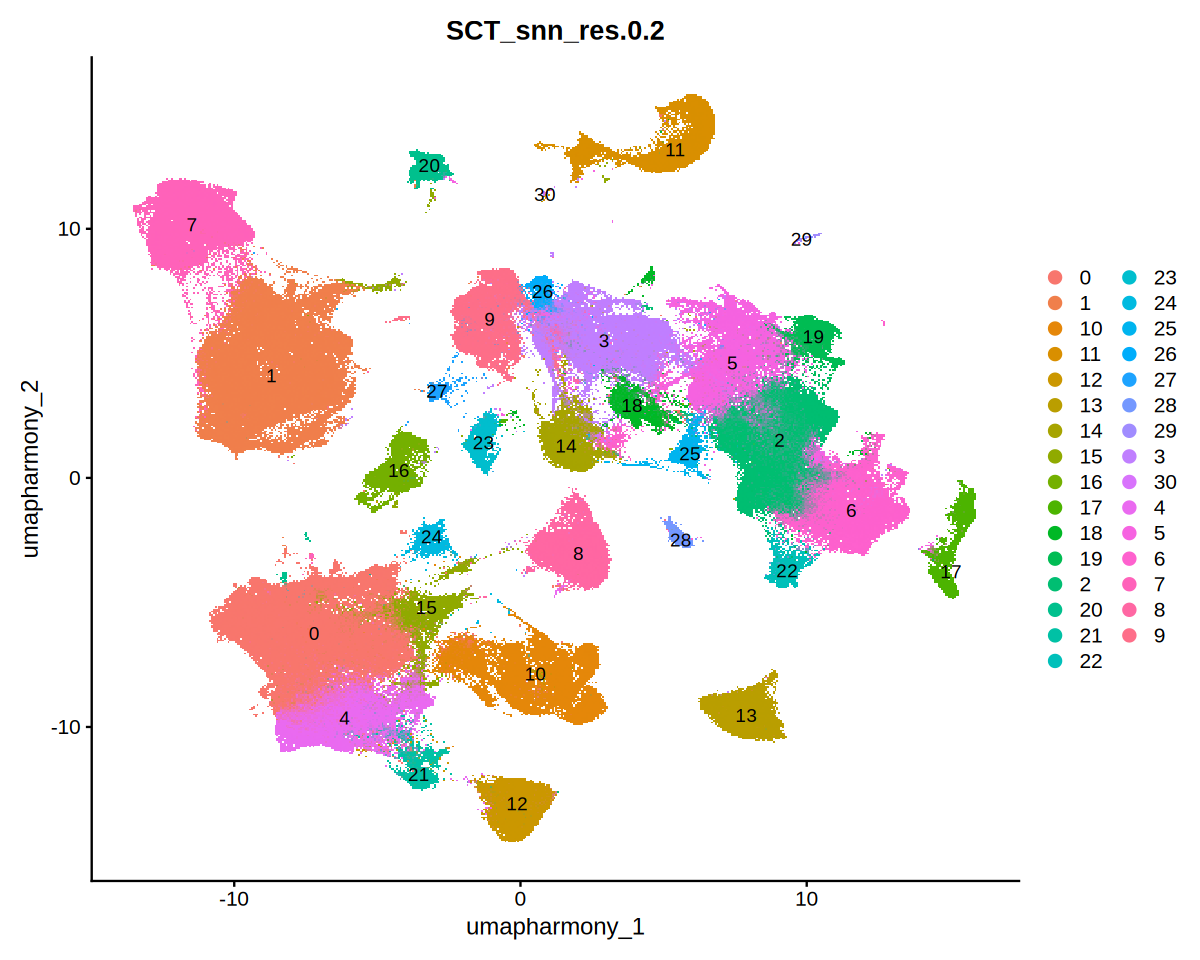

In [49]:
p2

In [80]:
cluster11 |> head(10)
cluster12 |> head(10)
cluster13 |> head(10)
cluster14 |> head(10)
cluster15 |> head(15)
cluster16 |> head(10)
cluster17 |> head(10)
cluster18 |> head(10)
cluster19 |> head(10)

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
OPALIN,0,8.897893,0.321,0.001,0,11,OPALIN
ENSG00000286749,0,8.700621,0.464,0.003,0,11,ENSG00000286749
MAG,0,8.403953,0.644,0.004,0,11,MAG
ENSG00000289591,0,8.355869,0.304,0.001,0,11,ENSG00000289591
KLK6,0,8.286395,0.407,0.002,0,11,KLK6
MOG,0,8.283452,0.683,0.004,0,11,MOG
CNDP1,0,8.049167,0.711,0.007,0,11,CNDP1
PRR18,0,7.998429,0.257,0.001,0,11,PRR18
HAPLN2,0,7.954981,0.467,0.003,0,11,HAPLN2


,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
IFI27,0,5.396684,0.993,0.089,0,12,IFI27
ISG15,0,5.050672,0.997,0.194,0,12,ISG15
RSAD2,0,4.749158,0.700,0.037,0,12,RSAD2
IFIT1,0,4.715843,0.857,0.052,0,12,IFIT1
MX1,0,4.306185,0.946,0.108,0,12,MX1
IFIT3,0,4.277863,0.837,0.068,0,12,IFIT3
IFI44L,0,4.028149,0.930,0.114,0,12,IFI44L
CMPK2,0,4.018193,0.314,0.021,0,12,CMPK2
IFIH1,0,4.010203,0.540,0.042,0,12,IFIH1


,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
SEC61G-DT,0,9.649133,0.923,0.004,0,13,SEC61G-DT
H2BC9,0,5.678665,0.319,0.007,0,13,H2BC9
SEC61G,0,4.856888,0.989,0.285,0,13,SEC61G
TENM3,0,4.618079,0.848,0.045,0,13,TENM3
LINC01036,0,4.509828,0.468,0.021,0,13,LINC01036
COL23A1,0,4.437716,0.447,0.018,0,13,COL23A1
PRAME,0,4.385471,0.515,0.026,0,13,PRAME
ENSG00000258081,0,4.221458,0.907,0.059,0,13,ENSG00000258081
MYC,0,4.187547,0.741,0.067,0,13,MYC


,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
ASPM,0,5.357654,0.721,0.034,0,14,ASPM
DLGAP5,0,5.046042,0.489,0.019,0,14,DLGAP5
DEPDC1,0,4.916320,0.371,0.015,0,14,DEPDC1
CENPF2,0,4.868041,0.928,0.081,0,14,CENPF
TPX21,0,4.724002,0.760,0.044,0,14,TPX2
MKI67,0,4.715788,0.759,0.043,0,14,MKI67
TOP2A1,0,4.709677,0.879,0.064,0,14,TOP2A
NUSAP1,0,4.709222,0.812,0.053,0,14,NUSAP1
KIF2C,0,4.690651,0.431,0.019,0,14,KIF2C


,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
MT1G,0,8.441314,0.327,0.014,0,15,MT1G
ENSG00000278996,0,5.000717,0.439,0.043,0,15,ENSG00000278996
ENSG00000280441,0,4.682554,0.581,0.095,0,15,ENSG00000280441
MT1X,0,4.569739,0.504,0.127,0,15,MT1X
MT1E,0,4.194304,0.374,0.078,0,15,MT1E
NUPR1,0,3.901352,0.389,0.066,0,15,NUPR1
SNHG12,0,3.836114,0.326,0.058,0,15,SNHG12
C15orf48,0,3.831382,0.277,0.022,0,15,C15orf48
PLIN21,0,3.746331,0.484,0.094,0,15,PLIN2


,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
FCRL1,0,10.224451,0.496,0.001,0,16,FCRL1
TCL1A,0,9.694000,0.398,0.001,0,16,TCL1A
CD79A,0,9.594113,0.857,0.004,0,16,CD79A
MS4A1,0,9.434864,0.764,0.002,0,16,MS4A1
VPREB3,0,8.938470,0.389,0.001,0,16,VPREB3
IGHD,0,8.919414,0.579,0.001,0,16,IGHD
FCER2,0,8.846465,0.336,0.001,0,16,FCER2
BANK1,0,8.754345,0.808,0.007,0,16,BANK1
IGHM,0,8.680019,0.763,0.006,0,16,IGHM


,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
COL3A1,0,9.163928,0.274,0.002,0,17,COL3A1
COL1A1,0,8.382771,0.259,0.003,0,17,COL1A1
COL1A2,0,7.379626,0.361,0.008,0,17,COL1A2
DCN,0,7.011845,0.338,0.007,0,17,DCN
TAGLN,0,7.006531,0.283,0.019,0,17,TAGLN
BGN,0,6.660498,0.345,0.013,0,17,BGN
RGS5,0,6.468433,0.289,0.013,0,17,RGS5
MYL9,0,6.467293,0.280,0.011,0,17,MYL9
PDGFRB,0,6.334933,0.272,0.007,0,17,PDGFRB


,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
DCT,0,8.361209,0.720,0.012,0,18,DCT
GAPDHS,0,8.106021,0.335,0.001,0,18,GAPDHS
LINC00681,0,7.886572,0.382,0.002,0,18,LINC00681
TRPM1,0,7.867433,0.381,0.004,0,18,TRPM1
ENSG00000288692,0,7.738379,0.319,0.003,0,18,ENSG00000288692
ENSG00000255429,0,7.678291,0.345,0.002,0,18,ENSG00000255429
TYR,0,7.427023,0.608,0.006,0,18,TYR
TRIM63,0,7.402004,0.251,0.001,0,18,TRIM63
MLANA,0,7.156941,0.689,0.009,0,18,MLANA


,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
OBI1-AS11,0,5.804119,0.393,0.016,0,19,OBI1-AS1
ENSG00000287704,0,5.178029,0.461,0.018,0,19,ENSG00000287704
LINC010881,0,5.118310,0.437,0.024,0,19,LINC01088
ADCY21,0,5.117145,0.717,0.040,0,19,ADCY2
PPP1R9A-AS1,0,4.996807,0.443,0.030,0,19,PPP1R9A-AS1
ENSG00000285971,0,4.890522,0.287,0.013,0,19,ENSG00000285971
KCNN3,0,4.664005,0.414,0.023,0,19,KCNN3
LNC-LBCS,0,4.569577,0.281,0.015,0,19,LNC-LBCS
CFAP54,0,4.547097,0.293,0.022,0,19,CFAP54


In [130]:
cluster21 |> head(15)
cluster22 |> head(10)
cluster23 |> head(10)
cluster24 |> head(10)
cluster25 |> head(10)
cluster26 |> head(10)
cluster27 |> head(10)
cluster28 |> head(10)
cluster29 |> head(10)
cluster30 |> head(10)

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
CXCL10,0,7.687238,0.847,0.016,0,21,CXCL10
CXCL11,0,6.686936,0.290,0.004,0,21,CXCL11
APOBEC3A1,0,4.171131,0.272,0.027,0,21,APOBEC3A
RSAD21,0,4.152423,0.607,0.052,0,21,RSAD2
IFIT21,0,4.127529,0.581,0.056,0,21,IFIT2
OASL1,0,4.100728,0.516,0.049,0,21,OASL
GBP11,0,4.038955,0.711,0.075,0,21,GBP1
TNFSF101,0,3.948827,0.566,0.068,0,21,TNFSF10
IFIT31,0,3.928290,0.785,0.085,0,21,IFIT3


,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
FRMPD4,0,7.345133,0.416,0.007,0,22,FRMPD4
GALNTL6,0,7.307236,0.299,0.009,0,22,GALNTL6
DLGAP2,0,7.128575,0.371,0.009,0,22,DLGAP2
MTUS2,0,6.784175,0.357,0.008,0,22,MTUS2
SYNPR,0,6.535658,0.253,0.006,0,22,SYNPR
FSTL4,0,6.515908,0.250,0.007,0,22,FSTL4
CNTN5,0,6.442322,0.352,0.019,0,22,CNTN5
ATP8A2,0,6.440729,0.432,0.012,0,22,ATP8A2
OLFM3,0,6.417569,0.257,0.005,0,22,OLFM3


,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
CLDN5,0,9.907750,0.793,0.007,0,23,CLDN5
VWF,0,9.815953,0.715,0.004,0,23,VWF
ENSG00000250863,0,9.682424,0.282,0.000,0,23,ENSG00000250863
DPEP1,0,9.623084,0.285,0.001,0,23,DPEP1
CLEC14A,0,9.462495,0.419,0.001,0,23,CLEC14A
SRARP,0,9.403299,0.429,0.001,0,23,SRARP
CLEC3B,0,9.149928,0.281,0.001,0,23,CLEC3B
TM4SF18,0,9.071492,0.372,0.001,0,23,TM4SF18
TIE1,0,9.031350,0.559,0.002,0,23,TIE1


,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
ADGRG3,0,6.165172,0.421,0.008,0,24,ADGRG3
FCGR3B,0,5.909598,0.280,0.005,0,24,FCGR3B
IL1R2,0,5.632673,0.451,0.014,0,24,IL1R2
ENSG00000288700,0,5.547831,0.318,0.015,0,24,ENSG00000288700
AQP91,0,5.141152,0.573,0.034,0,24,AQP9
NAMPT3,0,5.004633,0.962,0.259,0,24,NAMPT
ENSG00000188897,0,4.956658,0.301,0.022,0,24,ENSG00000188897
GLT1D11,0,4.893061,0.427,0.029,0,24,GLT1D1
PTGS2,0,4.844509,0.387,0.030,0,24,PTGS2


,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
LINC02109,0,9.563361,0.960,0.003,0,25,LINC02109
ANGPTL7,0,9.079287,0.261,0.001,0,25,ANGPTL7
ENSG00000250453,0,8.691057,0.579,0.002,0,25,ENSG00000250453
LINC01697,0,8.664397,0.372,0.002,0,25,LINC01697
GAGE12H,0,8.512910,0.426,0.001,0,25,GAGE12H
GDNF,0,7.776991,0.495,0.004,0,25,GDNF
THBS2,0,7.085371,0.888,0.022,0,25,THBS2
GAGE2A,0,7.020311,0.558,0.004,0,25,GAGE2A
C1QTNF3,0,6.799634,0.581,0.012,0,25,C1QTNF3


,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
MTURN1,0.000000e+00,3.497513,0.296,0.050,0.000000e+00,26,MTURN
GGTA1,0.000000e+00,3.482312,0.289,0.042,0.000000e+00,26,GGTA1
LTC4S,0.000000e+00,3.235561,0.257,0.047,0.000000e+00,26,LTC4S
MBP3,0.000000e+00,3.027936,0.728,0.250,0.000000e+00,26,MBP
FTL4,0.000000e+00,2.889480,0.984,0.777,0.000000e+00,26,FTL
TMIGD31,0.000000e+00,2.712014,0.313,0.064,0.000000e+00,26,TMIGD3
ENSG000002899017,0.000000e+00,2.519432,0.898,0.457,0.000000e+00,26,ENSG00000289901
GPX14,0.000000e+00,2.366239,0.862,0.322,0.000000e+00,26,GPX1
GPR341,9.476186e-278,2.362429,0.311,0.086,3.414933e-273,26,GPR34


,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
GP9,0,11.40691,0.661,0.001,0,27,GP9
LY6G6F,0,11.09600,0.326,0.000,0,27,LY6G6F
ENSG00000288758,0,10.76800,0.326,0.000,0,27,ENSG00000288758
PPBP,0,10.73656,0.781,0.011,0,27,PPBP
PF4,0,10.52774,0.775,0.007,0,27,PF4
SLC18A2-AS1,0,10.52116,0.330,0.000,0,27,SLC18A2-AS1
CLEC1B,0,10.50427,0.435,0.001,0,27,CLEC1B
TUBB11,0,10.37024,0.728,0.003,0,27,TUBB1
ENSG00000289621,0,10.07635,0.505,0.001,0,27,ENSG00000289621


,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
NKX2-1,0,9.576662,0.769,0.001,0,28,NKX2-1
FOXA1,0,9.209406,0.650,0.001,0,28,FOXA1
SFTA3,0,9.203831,0.497,0.001,0,28,SFTA3
ENSG00000256615,0,9.073594,0.796,0.003,0,28,ENSG00000256615
CEACAM6,0,9.027177,0.676,0.001,0,28,CEACAM6
CAPN8,0,8.830937,0.595,0.002,0,28,CAPN8
AGR3,0,8.787599,0.647,0.002,0,28,AGR3
SFTA2,0,8.776938,0.525,0.001,0,28,SFTA2
MSMB,0,8.771217,0.315,0.001,0,28,MSMB


,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
MMP9,0.000000e+00,6.433283,0.383,0.005,0.000000e+00,29,MMP9
SIX6,0.000000e+00,5.461098,0.289,0.006,0.000000e+00,29,SIX6
PCDHGA12,0.000000e+00,5.401931,0.297,0.007,0.000000e+00,29,PCDHGA12
PCDHGA11,0.000000e+00,5.171764,0.344,0.009,0.000000e+00,29,PCDHGA11
TTC9B,0.000000e+00,4.755524,0.594,0.020,0.000000e+00,29,TTC9B
HOXC10,0.000000e+00,4.674768,0.273,0.012,0.000000e+00,29,HOXC10
TAGLN1,0.000000e+00,4.566803,0.789,0.022,0.000000e+00,29,TAGLN
SOX15,1.893975e-304,4.476322,0.262,0.011,6.825319e-300,29,SOX15
C11orf98,0.000000e+00,4.449203,0.316,0.014,0.000000e+00,29,C11orf98


,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
ENSG00000290592,0,9.405283,0.268,0.000,0,30,ENSG00000290592
ENSG00000248991,0,9.331283,0.412,0.001,0,30,ENSG00000248991
CLEC4C,0,8.716573,0.557,0.001,0,30,CLEC4C
SCT,0,8.510253,0.443,0.001,0,30,SCT
LILRA4,0,8.296942,0.794,0.006,0,30,LILRA4
MIR4432HG,0,8.228019,0.515,0.002,0,30,MIR4432HG
DNASE1L3,0,8.118738,0.474,0.002,0,30,DNASE1L3
LINC01478,0,7.982945,0.495,0.002,0,30,LINC01478
JCHAIN1,0,7.952804,0.969,0.008,0,30,JCHAIN


In [109]:
# Create a new object excluding clusters 29 and 30
obj_2_cleaned <- subset(obj_2, idents = c(0:28))

# Verify the number of clusters
print(table(Idents(obj_2_cleaned)))


    0     1    10    11    12    13    14    15    16    17    18    19     2 
47193 44323 16612 12705 11132 10761  9049  6452  6355  5515  5478  5410 33906 
   20    21    22    23    24    25    26    27    28     3     4     5     6 
 3831  3224  2829  2783  2607  2310  1825  1200  1184 23703 21316 21220 19158 
    7     8     9 
18220 17653 16693 


Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



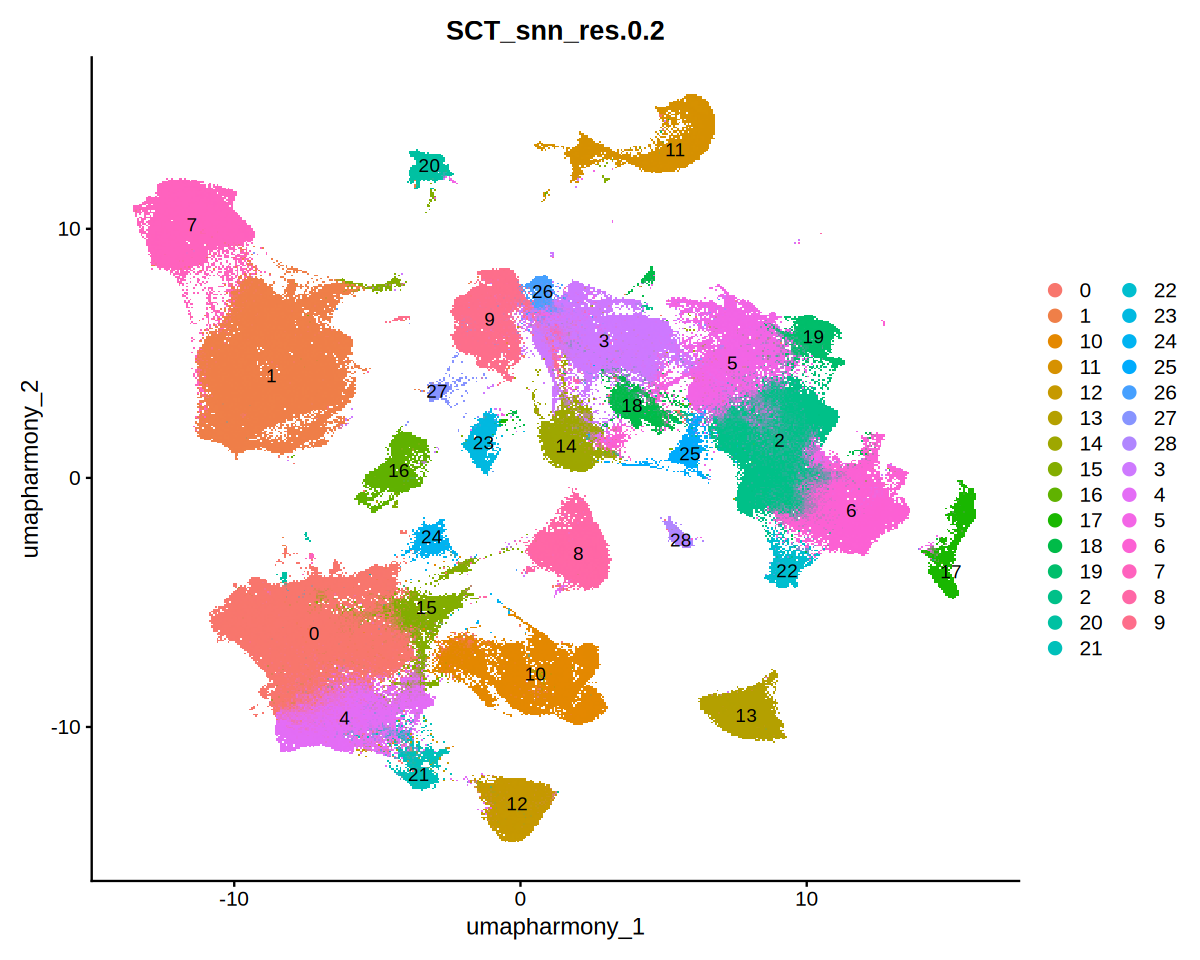

In [110]:
options(repr.plot.width = 10, repr.plot.height = 8)
DimPlot(obj_2_cleaned, reduction = 'umap.harmony', group.by = 'SCT_snn_res.0.2', label = TRUE)

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



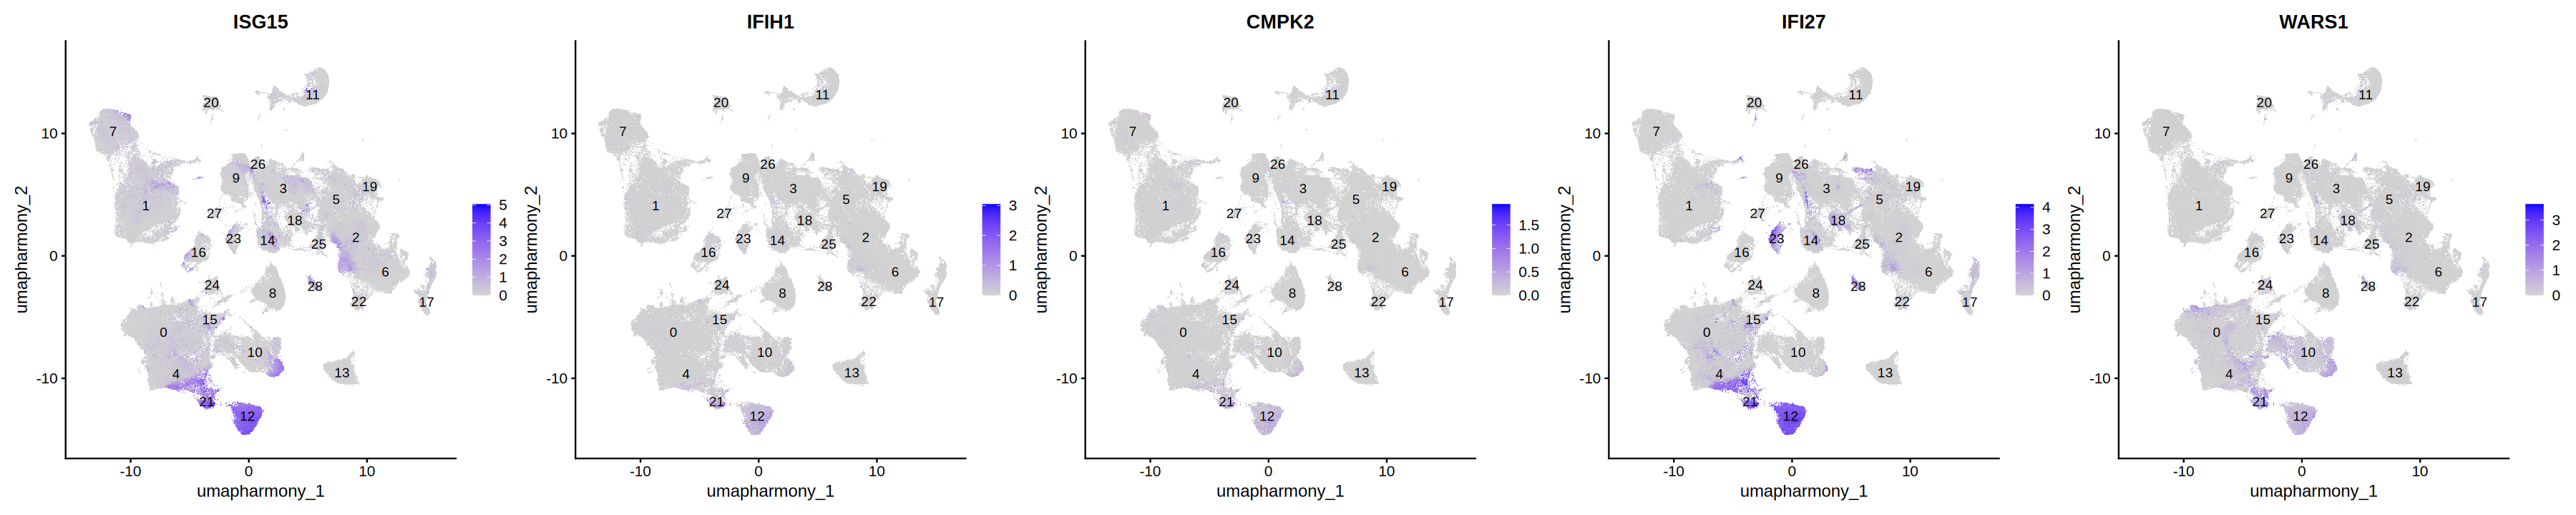

In [141]:
# Get top 6 markers from cluster 21
top_markers <- cluster21$gene[11:15]

# Create feature plots with custom settings
options(repr.plot.width = 30, repr.plot.height = 6)
p4 <- FeaturePlot(obj_2_cleaned, 
            features = top_markers,
            reduction = "umap.harmony",
            ncol = 5,
            label = TRUE)
p4

In [136]:
# Range
top_markers <- cluster21$gene[1:15]

# Flatten the markers for DotPlot
markers_genes <- unlist(top_markers)
markers_genes <- make.unique(markers_genes)

# Set factor levels in the order of your original markers vector
markers_genes <- factor(markers_genes, levels = markers_genes)

# Create a mapping from gene -> "Cluster0:Gene" label
label_map <- setNames(
  paste0("Cluster15:", markers_genes),
  markers_genes
)


In [137]:
DefaultAssay(obj_2) <- "SCT"
Idents(obj_2) <- "SCT_snn_res.0.2"

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


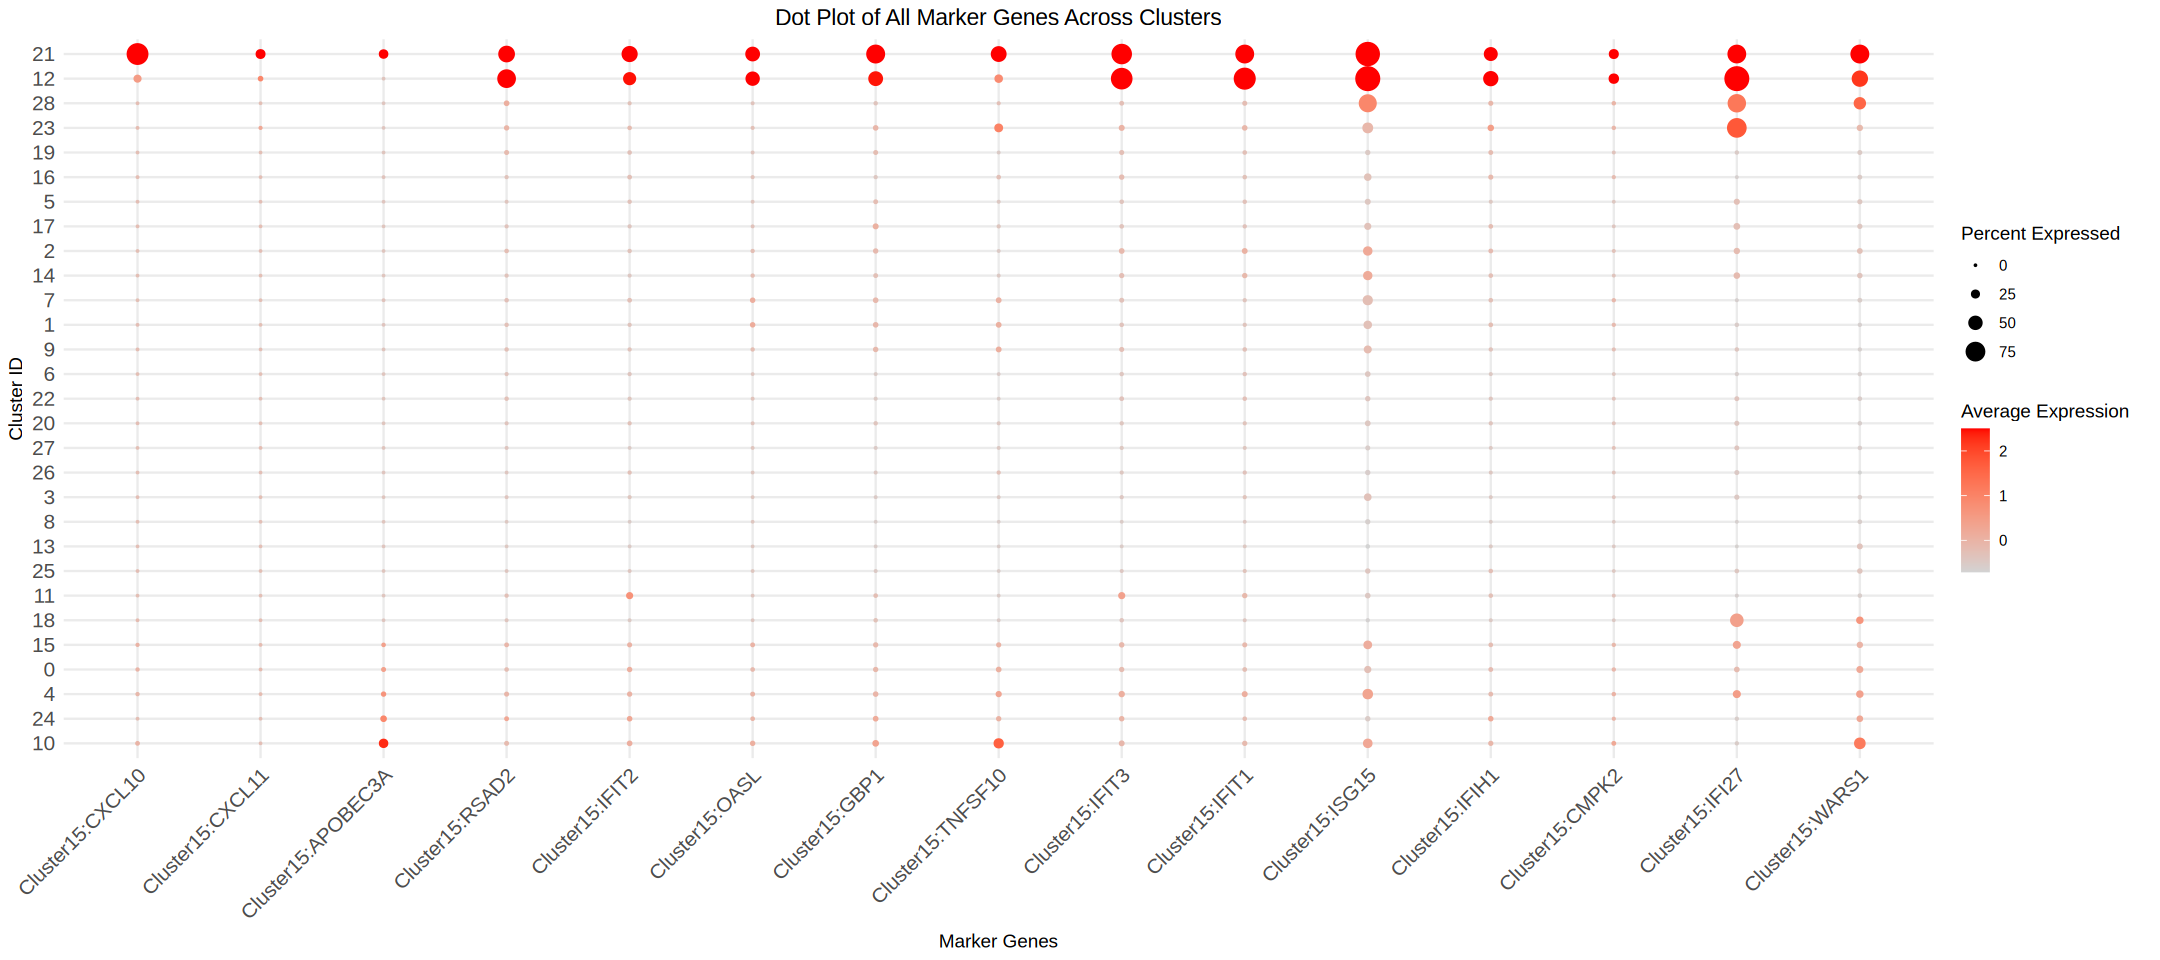

In [138]:
options(repr.plot.width = 18, repr.plot.height = 8)

library(Seurat)
library(ggplot2)

p5 <- DotPlot(obj_2_cleaned, features = markers_genes, cluster.idents = TRUE) +
  scale_color_gradient(low = "lightgrey", high = "red") +
  theme_minimal() +
  xlab("Marker Genes") +
  ylab("Cluster ID") +
  ggtitle("Dot Plot of All Marker Genes Across Clusters") +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1, size = 12),
    axis.text.y = element_text(size = 12),
    plot.title  = element_text(hjust = 0.5)
  ) +
  # Override labels so "CD3D" is displayed as "T_cells:CD3D", etc.
  scale_x_discrete(labels = label_map)

# Print the plot
p5

In [104]:
cluster0_genes <- all_markers |> filter(cluster == 0 & p_val_adj < 0.05 & avg_log2FC > 1) |> pull(gene)
cluster1_genes <- all_markers |> filter(cluster == 1 & p_val_adj < 0.05 & avg_log2FC > 1) |> pull(gene)
cluster2_genes <- all_markers |> filter(cluster == 2 & p_val_adj < 0.05 & avg_log2FC > 1) |> pull(gene)
cluster3_genes <- all_markers |> filter(cluster == 3 & p_val_adj < 0.05 & avg_log2FC > 1) |> pull(gene)
cluster4_genes <- all_markers |> filter(cluster == 4 & p_val_adj < 0.05 & avg_log2FC > 1) |> pull(gene)
cluster5_genes <- all_markers |> filter(cluster == 5 & p_val_adj < 0.05 & avg_log2FC > 1) |> pull(gene)
cluster6_genes <- all_markers |> filter(cluster == 6 & p_val_adj < 0.05 & avg_log2FC > 1) |> pull(gene)
cluster7_genes <- all_markers |> filter(cluster == 7 & p_val_adj < 0.05 & avg_log2FC > 1) |> pull(gene)
cluster8_genes <- all_markers |> filter(cluster == 8 & p_val_adj < 0.05 & avg_log2FC > 1) |> pull(gene)
cluster9_genes <- all_markers |> filter(cluster == 9 & p_val_adj < 0.05 & avg_log2FC > 1) |> pull(gene)
cluster10_genes <- all_markers |> filter(cluster == 10 & p_val_adj < 0.05 & avg_log2FC > 1) |> pull(gene)
cluster11_genes <- all_markers |> filter(cluster == 11 & p_val_adj < 0.05 & avg_log2FC > 1) |> pull(gene)
cluster12_genes <- all_markers |> filter(cluster == 12 & p_val_adj < 0.05 & avg_log2FC > 1) |> pull(gene)
cluster13_genes <- all_markers |> filter(cluster == 13 & p_val_adj < 0.05 & avg_log2FC > 1) |> pull(gene)
cluster14_genes <- all_markers |> filter(cluster == 14 & p_val_adj < 0.05 & avg_log2FC > 1) |> pull(gene)
cluster15_genes <- all_markers |> filter(cluster == 15 & p_val_adj < 0.05 & avg_log2FC > 1) |> pull(gene) 
cluster16_genes <- all_markers |> filter(cluster == 16 & p_val_adj < 0.05 & avg_log2FC > 1) |> pull(gene)
cluster17_genes <- all_markers |> filter(cluster == 17 & p_val_adj < 0.05 & avg_log2FC > 1) |> pull(gene)
cluster18_genes <- all_markers |> filter(cluster == 18 & p_val_adj < 0.05 & avg_log2FC > 1) |> pull(gene)
cluster19_genes <- all_markers |> filter(cluster == 19 & p_val_adj < 0.05 & avg_log2FC > 1) |> pull(gene)
cluster20_genes <- all_markers |> filter(cluster == 20 & p_val_adj < 0.05 & avg_log2FC > 1) |> pull(gene)
cluster21_genes <- all_markers |> filter(cluster == 21 & p_val_adj < 0.05 & avg_log2FC > 1) |> pull(gene)
cluster22_genes <- all_markers |> filter(cluster == 22 & p_val_adj < 0.05 & avg_log2FC > 1) |> pull(gene)
cluster23_genes <- all_markers |> filter(cluster == 23 & p_val_adj < 0.05 & avg_log2FC > 1) |> pull(gene)
cluster24_genes <- all_markers |> filter(cluster == 24 & p_val_adj < 0.05 & avg_log2FC > 1) |> pull(gene)
cluster25_genes <- all_markers |> filter(cluster == 25 & p_val_adj < 0.05 & avg_log2FC > 1) |> pull(gene)
cluster26_genes <- all_markers |> filter(cluster == 26 & p_val_adj < 0.05 & avg_log2FC > 1) |> pull(gene)
cluster27_genes <- all_markers |> filter(cluster == 27 & p_val_adj < 0.05 & avg_log2FC > 1) |> pull(gene)
cluster28_genes <- all_markers |> filter(cluster == 28 & p_val_adj < 0.05 & avg_log2FC > 1) |> pull(gene)
cluster29_genes <- all_markers |> filter(cluster == 29 & p_val_adj < 0.05 & avg_log2FC > 1) |> pull(gene) 
cluster30_genes <- all_markers |> filter(cluster == 30 & p_val_adj < 0.05 & avg_log2FC > 1) |> pull(gene) 

In [102]:
cluster15_genes |> head()

[1] "CLDN5"  "CAVIN2" "GNG11"  "FLT1"   "ESAM"   "SPARC"

In [131]:
# Convert gene symbols to Entrez IDs
entrez_ids <- bitr(
    cluster21_genes,
    fromType = "SYMBOL", 
    toType = "ENTREZID", 
    OrgDb = org.Hs.eg.db)

In [134]:
entrez_ids |> head()

SYMBOL,ENTREZID
<chr>,<chr>


In [132]:
# GO enrichment analysis
go_result <- enrichGO(gene = entrez_ids$ENTREZID,
                                         OrgDb = org.Hs.eg.db,
                                         ont = "BP",  # Biological Process
                                         pAdjustMethod = "BH",
                                         pvalueCutoff = 0.05,
                                         qvalueCutoff = 0.05
                                         )

--> No gene can be mapped....

--> Expected input gene ID: 7515,3005,149840,10721,55143,6502

--> return NULL...



In [133]:
# Visualize GO results
options(repr.plot.width = 8, repr.plot.height = 8)
dotplot(go_result, showCategory = 10) + 
    ggtitle("GO Enrichment Analysis for Cluster 21") +
    theme(plot.title = element_text(size = 16, face = "bold"),
          axis.text.y = element_text(size = 14),
          axis.text.x = element_text(size = 12, angle = 45, hjust = 1),
          axis.title = element_text(size = 14)) +
    scale_size(range = c(3, 8))

ERROR: Error: unable to find an inherited method for function ‘dotplot’ for signature ‘object = "NULL"’
